In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plyer import notification
import tkinter as tk
import tkinter.messagebox as ms

In [2]:
df = pd.read_csv("COVID_19.csv")

In [3]:
df.head()

,age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom,Label
0,23,Female,Bebusarai,Bebusarai,Bihar,India,India,Null,Null,Negative
1,41,Female,Balasore,Balasore,Orissa,India,India,Diabetes,Null,Negative
2,21,Female,Erode,Erode,Tamil Nadu,India,India,Null,Fever,Negative
3,55,Male,Gurugram,Gurugram,Haryana,Italy,Italy,BP,Fever,Positive
4,41,Female,Bhilwara,Bhilwara,Rajasthan,India,India,BP,Dry Cough,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             974 non-null    int64 
 1   gender          974 non-null    object
 2   Region1         974 non-null    object
 3   Region2         974 non-null    object
 4   detected_state  974 non-null    object
 5   nationality     974 non-null    object
 6   Travel_hist     974 non-null    object
 7   Disease_hist    974 non-null    object
 8   Symptom         974 non-null    object
 9   Label           974 non-null    object
dtypes: int64(1), object(9)
memory usage: 76.2+ KB


In [5]:
ds = df['gender']

In [6]:
u = ds.value_counts()
male = str(u['Male'])
female = str(u['Female'])
print(male)
print(female)

523
451


In [7]:
def notify_me(title,message):
    notification.notify(
        title=title,
        message=message,
        app_icon=None,  # e.g. 'C:\\icon_32x32.ico'
        timeout=10,  # seconds
    )

In [8]:
n_title = "Cases of Covid-19 : "
l = df['Label']
y = l.value_counts().to_list()
gndr = ['Number of Male infected :  ' , 'Number of Female infected : ', 'Number of positive cases : ' , 'Number of Negative cases : ']
n_message = f"{gndr[0]}  {male}  \n{gndr[1]} {female} \n {gndr[2]} {y[0]} \n {gndr[3]} {y[1]}"
notify_me(n_title,  n_message)

In [9]:
from collections import Counter
Counter(df["Label"]) 

Counter({'Negative': 337, 'Positive': 637})

In [10]:
l = df['Label']
y = l.value_counts().to_list()

In [11]:
X = df.iloc[:,0:9]
Y = df.iloc[:,9]
Y.head()

0    Negative
1    Negative
2    Negative
3    Positive
4    Positive
Name: Label, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    #print df[c].dtype
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings[c]
        df[c] = encodings[c].fit_transform(df[c])
print(encodings)

{'gender': LabelEncoder(), 'Region1 ': LabelEncoder(), 'Region2': LabelEncoder(), 'detected_state': LabelEncoder(), 'nationality': LabelEncoder(), 'Travel_hist': LabelEncoder(), 'Disease_hist': LabelEncoder(), 'Symptom': LabelEncoder(), 'Label': LabelEncoder()}


In [13]:
X = df.iloc[:,0:9]
Y = df.iloc[:,9]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

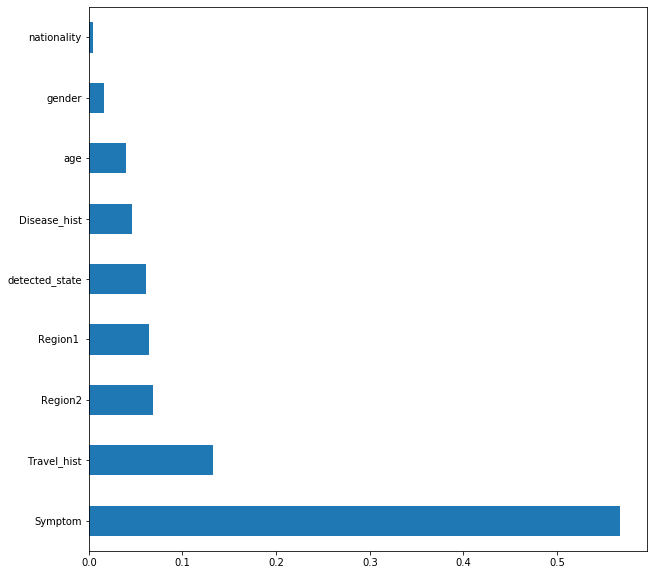

In [14]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler #normalization
std = StandardScaler()
X = std.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier 

# create regressor object 
clf = RandomForestClassifier(n_estimators=50,criterion='gini',  
random_state=0)

# fit the regressor with x and y data 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 


In [17]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[ 77   0]
 [  1 117]]
Accuracy Score : 0.9948717948717949
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.99      1.00       118

    accuracy                           0.99       195
   macro avg       0.99      1.00      0.99       195
weighted avg       0.99      0.99      0.99       195



In [18]:
def pred():
    age=45
    gender='Female'
    Region1='Solapur'
    Region2='Solapur'
    detected_state='Maharashtra'
    nationality='India'
    Travel_hist='Italy'
    Disease_hist='Null'
    Symptom='Null'

    data=[[age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom]]
    dfX = pd.DataFrame(data, columns = ['age','gender','Region1 ','Region2','detected_state','nationality','Travel_hist','Disease_hist','Symptom'])
    print(dfX)
    for c in dfX.columns:
        #print df[c].dtype
        if dfX[c].dtype == "object":
            dfX[c] = encodings[c].transform(dfX[c])
    X_test1 = std.transform(dfX)
    y_pred1 = clf.predict(X_test1) 
    ans = encodings['Label'].inverse_transform(y_pred1)
    for dt in ans:
      if dt=='Positive':
        print("Result : High chances of COVID-19")
      else:
        print("Result : You are not suffering from COVID-19")

In [19]:
r = tk.Tk() 
r.title('COVID_19') 
button = tk.Button(r, text='Go', width=25, command=pred)
button.pack() 
r.mainloop() 

   age  gender Region1   Region2 detected_state nationality Travel_hist  \
0   45  Female  Solapur  Solapur    Maharashtra       India       Italy   

  Disease_hist Symptom  
0         Null    Null  
Result : High chances of COVID-19
